In [1]:

# Importing required libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('city_day.csv')

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df['AQI'].fillna(method = 'ffill',inplace = True)

In [5]:
Mumbai = df[df['City'] == 'Mumbai']

In [6]:
from fbprophet import Prophet 

Mumbai_data = Mumbai[['Date','AQI']]
Mumbai_data.reset_index(inplace = True,drop = True)

#Defining our training dataset
train_df = Mumbai_data
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
train_df

,ds,y
0,2015-01-01,76.0
1,2015-01-02,76.0
2,2015-01-03,76.0
3,2015-01-04,76.0
4,2015-01-05,76.0
...,...,...
2004,2020-06-27,64.0
2005,2020-06-28,64.0
2006,2020-06-29,54.0
2007,2020-06-30,54.0


<AxesSubplot:xlabel='ds'>

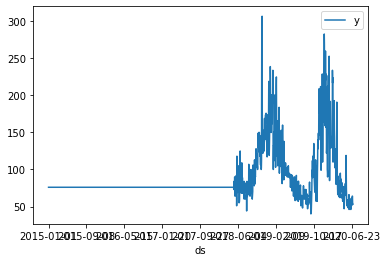

In [7]:
train_df.plot(x='ds',y='y')

In [8]:
#Defining the model and fitting on the training dataset
model = Prophet(holidays_prior_scale=0,seasonality_prior_scale=365,n_changepoints= 50,)
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
#Extrapolating the dates into future 
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2369,2021-06-27
2370,2021-06-28
2371,2021-06-29
2372,2021-06-30
2373,2021-07-01


In [10]:
#Forecasting the AQI values
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2369,2021-06-27,82.767552,39.462614,103.095525,71.457278,93.951379,-11.731534,-11.731534,-11.731534,1.784089,1.784089,1.784089,-13.515623,-13.515623,-13.515623,0.0,0.0,0.0,71.036018
2370,2021-06-28,82.731110,40.689125,104.343374,71.376769,93.943225,-12.156889,-12.156889,-12.156889,1.096511,1.096511,1.096511,-13.253400,-13.253400,-13.253400,0.0,0.0,0.0,70.574221
2371,2021-06-29,82.694668,37.915100,102.716694,71.296259,93.935071,-12.719452,-12.719452,-12.719452,0.311035,0.311035,0.311035,-13.030487,-13.030487,-13.030487,0.0,0.0,0.0,69.975217
2372,2021-06-30,82.658226,38.670670,102.092529,71.215750,93.926917,-13.678003,-13.678003,-13.678003,-0.826610,-0.826610,-0.826610,-12.851393,-12.851393,-12.851393,0.0,0.0,0.0,68.980223
2373,2021-07-01,82.621784,33.099387,102.246939,71.115384,93.936127,-13.802735,-13.802735,-13.802735,-1.083269,-1.083269,-1.083269,-12.719465,-12.719465,-12.719465,0.0,0.0,0.0,68.819050


In [11]:
#Calculating the cross  validation accuracy


from fbprophet.diagnostics import mape,cross_validation,performance_metrics
df_cv = cross_validation(model, initial='1100 days', period='130 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
print('Cross Validation accuracy:', (1 - df_p['mape'].mean())*100)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2018-01-28 00:00:00 and 2019-07-02 00:00:00
100%|██████████| 5/5 [00:32<00:00,  6.54s/it]


Cross Validation accuracy: 43.47602587978553


Time Series Analysis
2015-2020 ---> cross Validation


In [12]:
#Plotting out the forecast

from fbprophet.plot import plot_plotly

fig = plot_plotly(model, forecast ,xlabel = 'Date',ylabel= 'AQI',figsize=(900,750))
fig.show()

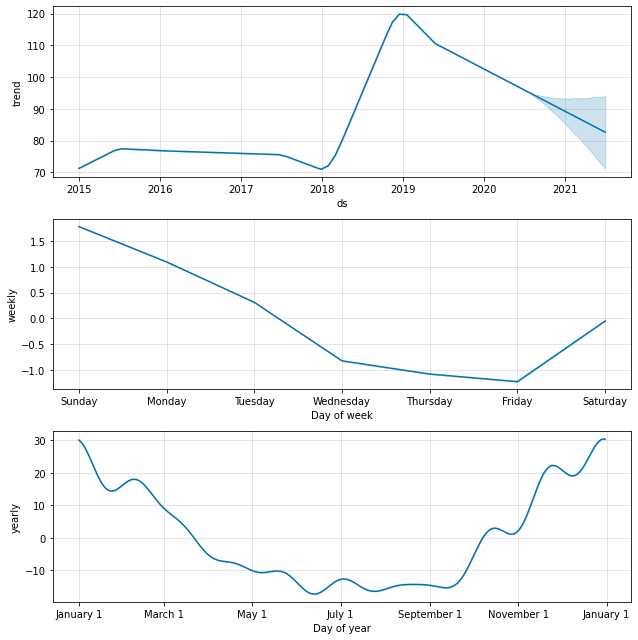

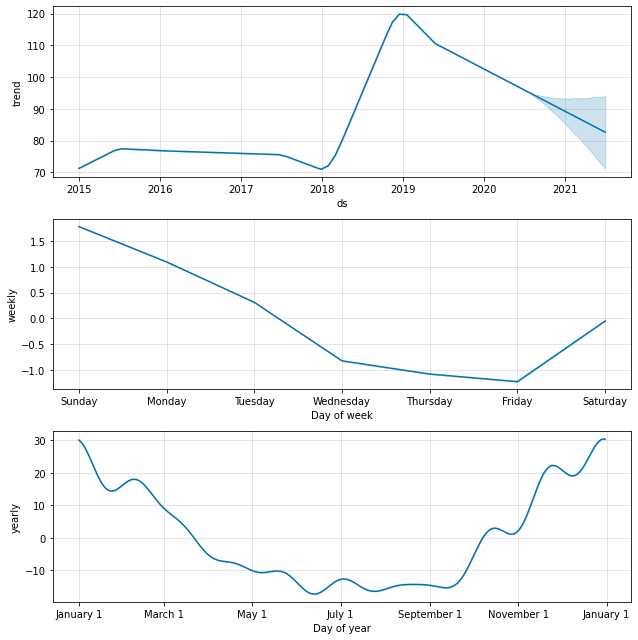

In [13]:
model.plot_components(forecast)

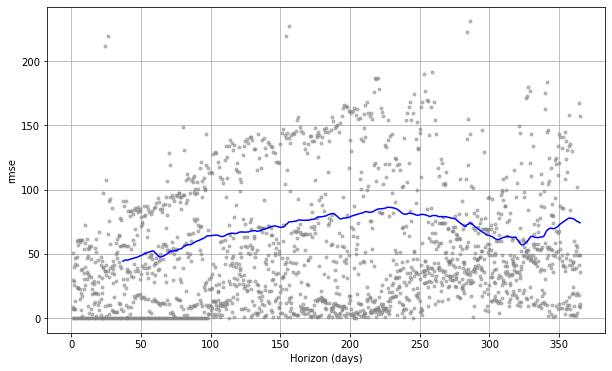

In [14]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')


In [15]:
predected=forecast.iloc[2000:,:]


In [16]:
predected.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2000,2020-06-23,96.214646,50.557758,112.811834,96.214646,96.214646,-14.432203,-14.432203,-14.432203,0.311035,0.311035,0.311035,-14.743238,-14.743238,-14.743238,0.0,0.0,0.0,81.782443
2001,2020-06-24,96.178204,49.609842,109.786830,96.178204,96.178204,-15.217143,-15.217143,-15.217143,-0.826610,-0.826610,-0.826610,-14.390533,-14.390533,-14.390533,0.0,0.0,0.0,80.961061
2002,2020-06-25,96.141762,48.723932,109.758382,96.141762,96.141762,-15.135037,-15.135037,-15.135037,-1.083269,-1.083269,-1.083269,-14.051768,-14.051768,-14.051768,0.0,0.0,0.0,81.006725
2003,2020-06-26,96.105320,51.472737,112.531939,96.105320,96.105320,-14.965622,-14.965622,-14.965622,-1.230858,-1.230858,-1.230858,-13.734765,-13.734765,-13.734765,0.0,0.0,0.0,81.139698
2004,2020-06-27,96.068878,54.241317,114.103763,96.068878,96.068878,-13.497568,-13.497568,-13.497568,-0.050898,-0.050898,-0.050898,-13.446670,-13.446670,-13.446670,0.0,0.0,0.0,82.571310


In [17]:
newData=predected[['ds','yhat']]


In [25]:
newDate=(predected['ds'])
newData=(predected['yhat'])

In [29]:
newData.to_numpy()

array([ 81.78244317,  80.96106089,  81.00672453,  81.13969758,
        82.57131036,  84.62273317,  84.11105119,  83.45670252,
        82.40237001,  82.17939802,  82.01531041,  83.12926213,
        84.85059831,  84.00470888,  83.02024631,  81.64780361,
        81.12612927,  80.6894614 ,  81.56281805,  83.08042202,
        82.07145139,  80.96718593,  79.51964784,  78.96781395,
        78.54498099,  79.47411927,  81.08639056,  80.20701792,
        79.26257358,  77.9997785 ,  77.65188573,  77.44622351,
        78.59972816,  80.43763677,  79.77952257,  79.0467339 ,
        77.98132633,  77.81255636,  77.76450981,  79.05169292,
        80.99775529,  80.42152703,  79.74443231,  78.70937006,
        78.54713304,  78.48394153,  79.73692352,  81.63271468,
        80.99336541,  80.24362172,  79.12967569,  78.8854613 ,
        78.74007631,  79.91316592,  81.73344484,  81.02454773,
        80.21227641,  79.04334084,  78.7516695 ,  78.5658692 ,
        79.70466832,  81.49551774,  80.76053614,  79.92

In [20]:
# newData.plot(x='ds',y='yhat')